# Random Forest

#### Import der Bibliotheken und Utility-Funktionen

In [41]:
import imp
import os
import numpy as np
from sklearn import datasets

In [42]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [53]:
# Import weiterer py-files, Aufruf mit utils.xyz
!wget https://raw.githubusercontent.com/dsbademo/DSBA/main/utils.py
#os.listdir("./")
utils = imp.load_source("utils", "./utils.py")

--2022-09-27 14:16:05--  https://raw.githubusercontent.com/dsbademo/DSBA/main/utils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2384 (2.3K) [text/plain]
Saving to: ‘utils.py’

utils.py            100%[===================>]   2.33K  --.-KB/s    in 0s      

2022-09-27 14:16:05 (43.5 MB/s) - ‘utils.py’ saved [2384/2384]



#### Import und Vorverarbeitung der Iris Daten

In [44]:
iris = datasets.load_iris()

In [45]:
f1 = 0
f2 = 1
X = iris.data[0:100, (f1, f2)]
#X = np.concatenate((iris.data[0:50, (f1, f2)], iris.data[50:100, (f1, f2)]))
#X = iris.data[50:150, (f1, f2)]
y = iris.target[0:100]

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [47]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std = X_train
X_test_std = X_test

#### Random Forest

In [48]:
from sklearn.ensemble import RandomForestRegressor
ranForest = RandomForestRegressor(random_state=0)

#### Training des Modells

In [49]:
ranForest.fit(X_train_std, y_train)

RandomForestRegressor(random_state=0)

#### Vorhersage der Klassen

In [50]:
y_pred = ranForest.predict(X_test_std)

#### Bewertung des Modells

In [51]:
print("Number of mislabeled points out of a total %d points : %d" % (X_test_std.shape[0],(y_test != y_pred).sum()))

Number of mislabeled points out of a total 30 points : 6


#### Plot der Entscheidungsgrenze

<class 'numpy.ndarray'>


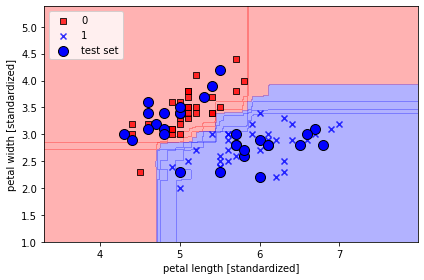

In [54]:
utils.plot_decision_regions(
    X_train=X_train_std,
    X_test=X_test_std,
    y_train=y_train,
    y_test=y_test,
    classifier=ranForest,
    xlabel='petal length [standardized]',
    ylabel='petal width [standardized]')
plt.savefig('ran_forest_iris', dpi=300)
plt.show()